## EDA - Loan analysis         


# Data cleaning and handling missing values :

1. Are there any missing values in the dataset? If yes, which columns have them and what's the percentage of missing values in each column?
2. Are there any duplicate rows in the dataset? If yes, how many duplicate rows are there?
3. Are there any invalid values in the fico column? For example, are there FICO scores outside the typical range (300-850)?
4. Does the installment column have outliers? If so, how can you effectively handle these outliers to avoid distorting the analysis?
5. What would be the most appropriate method to fill in missing values for numerical columns like int.rate or installment? (mean, median, regression, etc.)


# Visualisation :


1. What is the distribution of the installment column? Are there any values that seem unrealistic?
2. Compare the distribution of FICO scores for loans that were fully paid versus those that were not fully paid.
3. What is the distribution of the interest rate (int.rate) for different loan purposes? Interpret your results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#laoding the dataset

data = pd.read_csv("C:/Users/91771/Downloads/Loan Data - loan_data.csv")

#Using head to see the sample five rows of dataset

data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0.0


In [3]:
#Checking more basic information about dataset

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9780 entries, 0 to 9779
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9780 non-null   int64  
 1   purpose            9779 non-null   object 
 2   int.rate           9780 non-null   float64
 3   installment        9779 non-null   float64
 4   log.annual.inc     9779 non-null   float64
 5   dti                9779 non-null   float64
 6   fico               9778 non-null   float64
 7   days.with.cr.line  9776 non-null   float64
 8   revol.bal          9777 non-null   float64
 9   revol.util         9779 non-null   float64
 10  inq.last.6mths     9778 non-null   float64
 11  delinq.2yrs        9778 non-null   float64
 12  pub.rec            9777 non-null   float64
 13  not.fully.paid     9775 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9780.000000,9780.000000,9779.000000,9779.000000,9779.000000,9778.000000,9776.000000,9.777000e+03,9779.000000,9778.000000,9778.000000,9777.000000,9775.000000
mean,0.808998,0.122231,317.519258,10.933792,12.550858,707.428615,4562.531382,1.689948e+04,46.653153,1.563510,0.163530,0.062084,0.159795
std,0.393111,0.026888,206.741455,0.616909,6.886031,56.544912,2505.199977,3.356204e+04,29.031750,2.185221,0.544766,0.261658,0.366435
min,0.000000,0.060000,15.670000,7.547502,0.000000,295.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.102800,162.815000,10.558414,7.140000,682.000000,2795.000000,3.171000e+03,22.300000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,267.730000,10.933107,12.590000,707.000000,4139.041667,8.547000e+03,46.100000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.139200,429.180000,11.302204,17.895000,737.000000,5730.041667,1.827300e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
#Checking the percentage of missing value

percentage_of_missing_values_in_each_column = data.isnull().sum()/len(data)*100  
print(percentage_of_missing_values_in_each_column)



credit.policy        0.000000
purpose              0.010225
int.rate             0.000000
installment          0.010225
log.annual.inc       0.010225
dti                  0.010225
fico                 0.020450
days.with.cr.line    0.040900
revol.bal            0.030675
revol.util           0.010225
inq.last.6mths       0.020450
delinq.2yrs          0.020450
pub.rec              0.030675
not.fully.paid       0.051125
dtype: float64


In [5]:
#Checking for duplicates rows, and count of it

count_of_duplicated_rows = data.duplicated().sum()
print(count_of_duplicated_rows)

190


In [6]:
#Deleting the duplicated rows from the dataset

data.drop_duplicates(inplace = True)

In [7]:
#Verufying the duplicates rows are deleted or not 

count_of_duplicated_rows = data.duplicated().sum()
print(count_of_duplicated_rows)


0


In [8]:
#To check invalid entries in fico column in the dataset i.e outside the range (300-850)

fico_invalid_entries= data[(data['fico']>300 ) | (data['fico']<850)]


print(fico_invalid_entries)

      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9749              1         educational    0.0901       572.48   
9752              1    home_improvement    0.0712        92.80   
9758              1         credit_card    0.1028       485.99   
9766              1                 NaN    0.0870       126.65   
9771              1         educational    0.1028        29.16   

      log.annual.inc    dti   fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48  737.0        5639.958333    28854.0        52.1   
1          11.082143  14.29  707.0        2760.

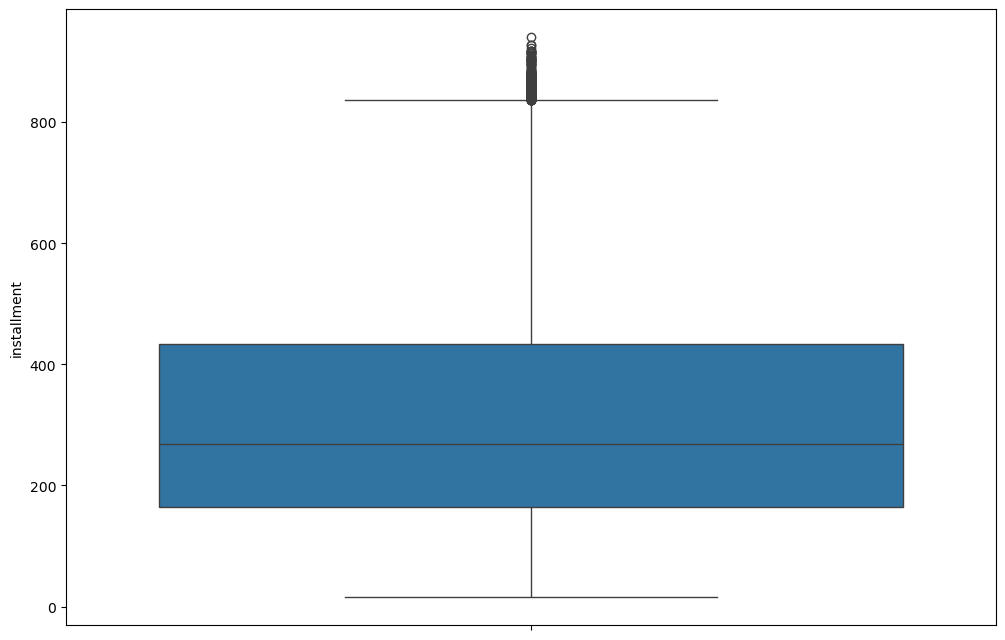

In [24]:
#To detect the outlers in installment column we can depict thie BOXPLOT

plt.figure(figsize=(12,8))
sns.boxplot(data['installment'])
plt.show()

In [37]:
#Handling missing values in int.rate and installment column

data['int.rate'].fillna(data['int.rate'].mean() ,inplace = True)
data['installment'].fillna(data['installment'].mean() , inplace = True)

C:\Users\91771\AppData\Local\Temp\ipykernel_36640\1500581703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['int.rate'].fillna(data['int.rate'].mean() ,inplace = True)
C:\Users\91771\AppData\Local\Temp\ipykernel_36640\1500581703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [41]:
#verifying  int.rate and installment column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9590 entries, 0 to 9771
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9590 non-null   int64  
 1   purpose            9589 non-null   object 
 2   int.rate           9590 non-null   float64
 3   installment        9590 non-null   float64
 4   log.annual.inc     9589 non-null   float64
 5   dti                9589 non-null   float64
 6   fico               9588 non-null   float64
 7   days.with.cr.line  9586 non-null   float64
 8   revol.bal          9587 non-null   float64
 9   revol.util         9589 non-null   float64
 10  inq.last.6mths     9588 non-null   float64
 11  delinq.2yrs        9588 non-null   float64
 12  pub.rec            9587 non-null   float64
 13  not.fully.paid     9585 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [43]:
#No missing values in int.rate and installment column handled the missing values values replacing it by mean

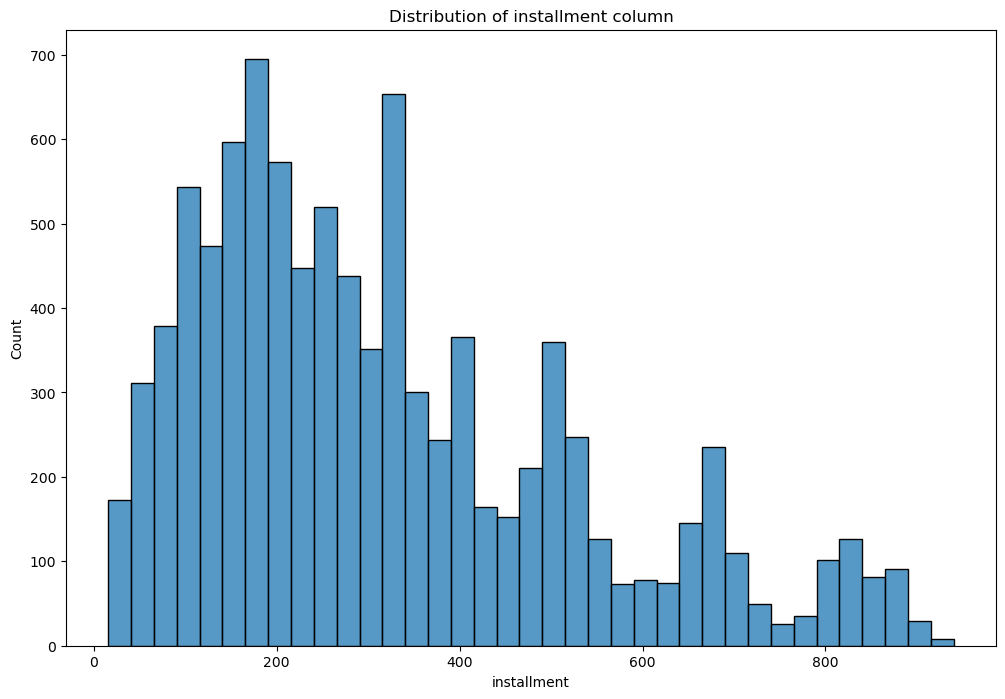

In [73]:
#Plotting the distribution of installment column
plt.figure(figsize=(12,8))
sns.histplot(x=data['installment'])
plt.title("Distribution of installment column")
plt.show()

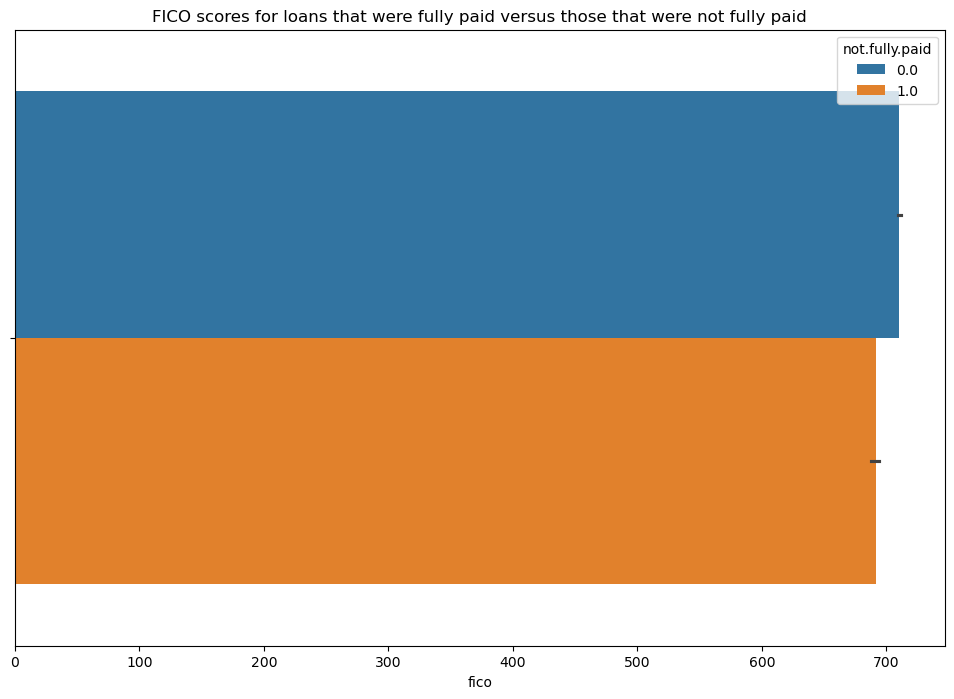

In [81]:
#Plotting the distribution of FICO scores for loans that were fully paid versus those that were not fully paid.
plt.figure(figsize=(12,8))
sns.barplot(data = data ,x=data['fico'], hue ="not.fully.paid")
plt.title("FICO scores for loans that were fully paid versus those that were not fully paid")
plt.show()

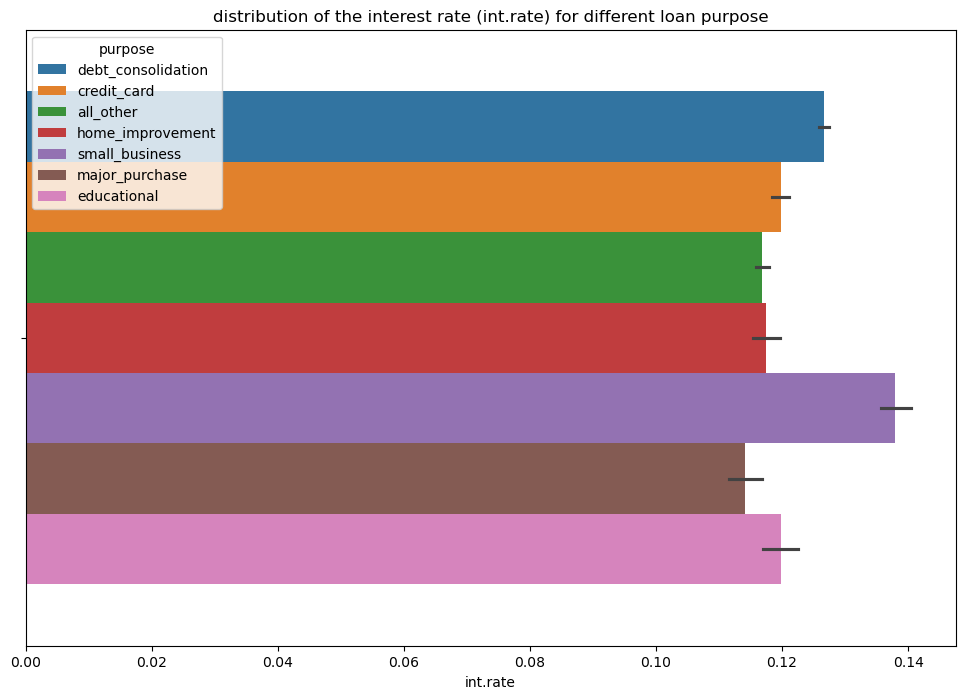

In [79]:
#distribution of the interest rate (int.rate) for different loan purpose.

plt.figure(figsize=(12,8))
sns.barplot(data = data ,x=data['int.rate'], hue ="purpose")
plt.title("distribution of the interest rate (int.rate) for different loan purpose")
plt.show()

